#### Обучение алгоритма регрессии
1. Предобработка
2. Разделение на train/test
3. Выбор модели и гиперпараметров
4. Оптимизация параметров (Обучение)
5. Оценка по метрикам, проверка переобучения
6. Кросс-валидация (CV) для более стабильной оценки

In [97]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [98]:
FILE_PATH = 'Housing.csv'
data = pd.read_csv(FILE_PATH)

EDA(Exploratory Data Analysis)

In [99]:
data.head()

,rownames,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [100]:
data.shape

(546, 13)

In [101]:
data.dtypes

rownames     int64
price        int64
lotsize      int64
bedrooms     int64
bathrms      int64
stories      int64
driveway    object
recroom     object
fullbase    object
gashw       object
airco       object
garagepl     int64
prefarea    object
dtype: object

In [102]:
data.isna().sum()

rownames    0
price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [103]:
data.describe()

,rownames,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


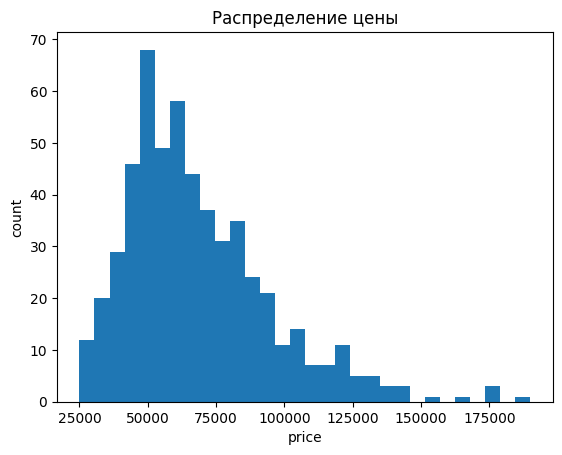

In [104]:
plt.figure()
plt.hist(data['price'], bins=30)
plt.title('Распределение цены')
plt.xlabel("price")
plt.ylabel('count')
plt.show()

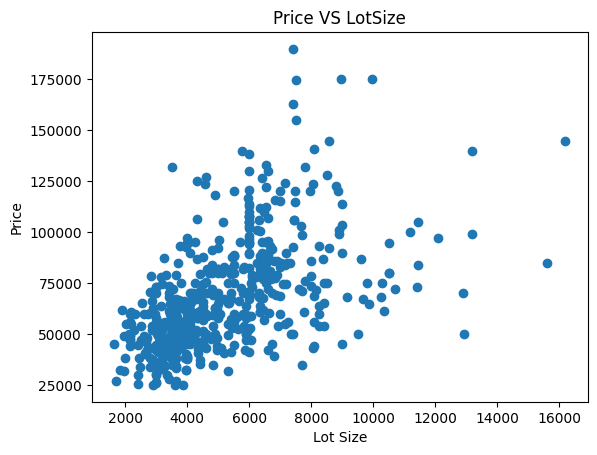

In [105]:
plt.figure()
plt.scatter(data['lotsize'], data['price'])
plt.title("Price VS LotSize")
plt.xlabel("Lot Size")
plt.ylabel("Price")
plt.show()

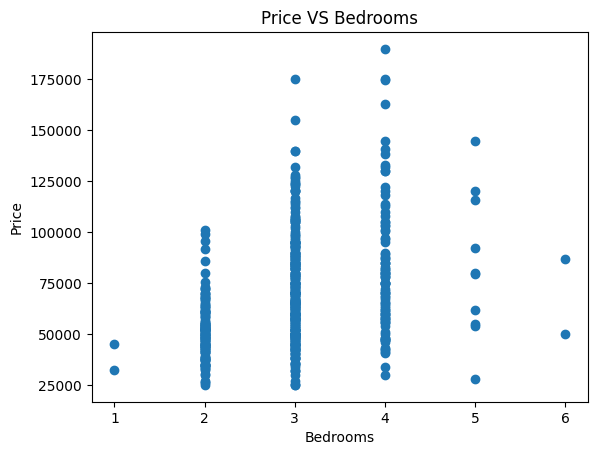

In [106]:
plt.figure()
plt.scatter(data['bedrooms'], data['price'])
plt.title("Price VS Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

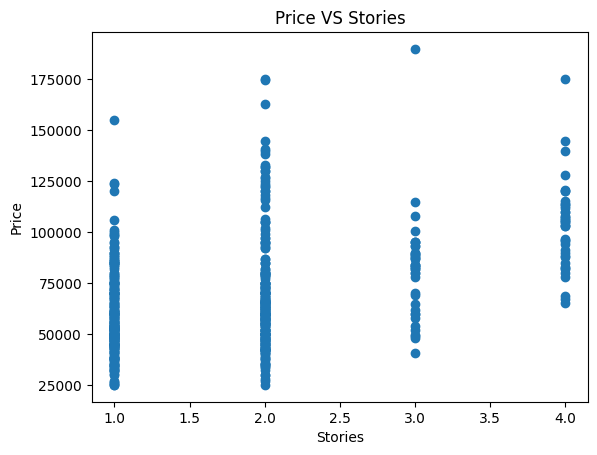

In [107]:
plt.figure()
plt.scatter(data['stories'], data['price'])
plt.title("Price VS Stories")
plt.xlabel("Stories")
plt.ylabel("Price")
plt.show()

1. Предобработка

In [108]:
target = 'price'
numeric_cols = ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']
potential_cols = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

categorical_cols = [c for c in potential_cols if c in data.columns]
all_cols = numeric_cols + categorical_cols + [target]
df = data[all_cols].copy()
df.head()


,lotsize,bedrooms,bathrms,stories,garagepl,driveway,recroom,fullbase,gashw,airco,prefarea,price
0,5850,3,1,2,1,yes,no,yes,no,no,no,42000
1,4000,2,1,1,0,yes,no,no,no,no,no,38500
2,3060,3,1,1,0,yes,no,no,no,no,no,49500
3,6650,3,1,2,0,yes,yes,no,no,no,no,60500
4,6360,2,1,1,0,yes,no,no,no,no,no,61000


In [109]:
df_factorized = df.copy()
factorized_map = {}
for col in categorical_cols:
    codes, uniques = pd.factorize(df_factorized[col])
    df_factorized[col] = codes
    factorized_map[col] = list(uniques)
display(df_factorized.head())
factorized_map

,lotsize,bedrooms,bathrms,stories,garagepl,driveway,recroom,fullbase,gashw,airco,prefarea,price
0,5850,3,1,2,1,0,0,0,0,0,0,42000
1,4000,2,1,1,0,0,0,1,0,0,0,38500
2,3060,3,1,1,0,0,0,1,0,0,0,49500
3,6650,3,1,2,0,0,1,1,0,0,0,60500
4,6360,2,1,1,0,0,0,1,0,0,0,61000


{'driveway': ['yes', 'no'],
 'recroom': ['no', 'yes'],
 'fullbase': ['yes', 'no'],
 'gashw': ['no', 'yes'],
 'airco': ['no', 'yes'],
 'prefarea': ['no', 'yes']}

- One-Hot Encoding

In [110]:
df_onehot = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
df_onehot.head()

,rownames,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,1,42000,5850,3,1,2,1,True,False,True,False,False,False
1,2,38500,4000,2,1,1,0,True,False,False,False,False,False
2,3,49500,3060,3,1,1,0,True,False,False,False,False,False
3,4,60500,6650,3,1,2,0,True,True,False,False,False,False
4,5,61000,6360,2,1,1,0,True,False,False,False,False,False


In [111]:
num_demo = data[numeric_cols].copy()
mms = MinMaxScaler()
std = StandardScaler()

num_mms = pd.DataFrame(mms.fit_transform(num_demo), columns=numeric_cols)
num_std = pd.DataFrame(std.fit_transform(num_demo), columns=numeric_cols)

display(num_mms.head())
display(num_std.head())

,lotsize,bedrooms,bathrms,stories,garagepl
0,0.288660,0.4,0.0,0.333333,0.333333
1,0.161512,0.2,0.0,0.000000,0.000000
2,0.096907,0.4,0.0,0.000000,0.000000
3,0.343643,0.4,0.0,0.333333,0.000000
4,0.323711,0.2,0.0,0.000000,0.000000


,lotsize,bedrooms,bathrms,stories,garagepl
0,0.323028,0.047235,-0.569495,0.221704,0.357567
1,-0.531013,-1.310147,-0.569495,-0.931157,-0.804525
2,-0.964958,0.047235,-0.569495,-0.931157,-0.804525
3,0.692343,0.047235,-0.569495,0.221704,-0.804525
4,0.558466,-1.310147,-0.569495,-0.931157,-0.804525


In [112]:
df_impute_demo = data.copy()
df_impute_demo.loc[df_impute_demo.sample(5, random_state=42).index, 'lotsize'] = np.nan
df_impute_demo.loc[df_impute_demo.sample(5, random_state=42).index, 'driveway'] = np.nan

print(df_impute_demo.isna().sum())

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

df_impute_demo[numeric_cols] = num_imputer.fit_transform(df_impute_demo[numeric_cols])
df_impute_demo[categorical_cols] = cat_imputer.fit_transform(df_impute_demo[categorical_cols])

rownames    0
price       0
lotsize     5
bedrooms    0
bathrms     0
stories     0
driveway    5
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64


In [113]:
print(df_impute_demo.isna().sum())


rownames    0
price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64
